In [3]:
# Import dependencies and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [101]:
# Investigate the structure of each dataset
# Handle missing values, duplicates, and any inconsistencies
# Standardize column names if needed
# Ensure compatibility of data types

In [4]:
# Load datasets into pandas dataframes
csv_path = "Resources/abs_stats.csv"
gender_region_df = pd.read_csv(csv_path)

csv_path2 = "Resources/life_expectancy_data.csv"
life_expect_df = pd.read_csv(csv_path2)

csv_path3 = "Resources/health_expend_data.csv"
health_expend_df = pd.read_csv(csv_path3)

## Gender

In [104]:
# Task (Aleksandra): Filter and analyze data related to gender and life expectancy
gender_cleaned = gender_region_df.dropna()
gender_cleaned

,Region,Males - 16-18,Females 16-18,Persons - 16-18,Males - 17-19,Females - 17-19,Persons - 17-19,Males - 18-20,Females - 18-20,Persons - 18-20
1,Central Coast,79.2,83.8,81.4,79.2,83.6,81.4,79.1,84.3,81.7
2,Sydney - Baulkham Hills and Hawkesbury,84.6,87.5,86.0,84.6,87.7,86.1,85.0,88.1,86.5
3,Sydney - Blacktown,80.8,84.7,82.7,81.2,84.6,82.8,81.7,84.9,83.3
4,Sydney - City and Inner South,81.2,86.3,83.7,81.3,86.3,83.7,81.7,86.3,84.0
5,Sydney - Eastern Suburbs,83.4,86.9,85.1,83.7,86.9,85.3,84.5,87.1,85.8
...,...,...,...,...,...,...,...,...,...,...
113,Rest of NT,72.8,76.2,74.5,72.2,76.6,74.3,73.0,77.4,75.1
114,Total Northern Territory,75.5,80.2,77.8,75.5,80.6,78.0,76.2,81.0,78.5
116,Australian Capital Territory,81.2,85.3,83.2,81.6,85.6,83.5,82.1,85.9,84.0
117,Total Australian Capital Territory,81.2,85.3,83.2,81.6,85.6,83.5,82.1,85.9,84.0


In [105]:
# Understanding the database by displaying summary statistic
print(gender_cleaned.describe())

       Males - 16-18  Females 16-18  Persons - 16-18  Males - 17-19  \
count     111.000000     111.000000       111.000000     111.000000   
mean       80.396396      84.594595        82.448649      80.401802   
std         2.160889       1.852362         1.962367       2.173183   
min        72.800000      76.200000        74.500000      72.200000   
25%        79.150000      83.700000        81.450000      79.200000   
50%        80.200000      84.700000        82.400000      80.200000   
75%        81.650000      85.800000        83.650000      81.800000   
max        85.300000      88.100000        86.700000      85.400000   

       Females - 17-19  Persons - 17-19  Males - 18-20  Females - 18-20  \
count       111.000000       111.000000     111.000000       111.000000   
mean         84.709009        82.491892      80.624324        85.004505   
std           1.795578         1.947499       2.201166         1.804660   
min          76.600000        74.300000      73.000000      

### Summary Analysis
* The mean life expectancy is consistently higher for females across all periods.

* The standard deviation for females is generally lower than for males, indicating less variability in female life expectancies across regions.

* Over the years 2016-2020, there is a slight increase in life expectancy for both women and men. Females consistently shoe higher life expectations over this period.

* There is variability in life expectanties in different regions, as indicated by standard deviations (will be explored later).

* The standard deviation remain relatively stable over the time, suggesting consistent patterns of life expectancy.

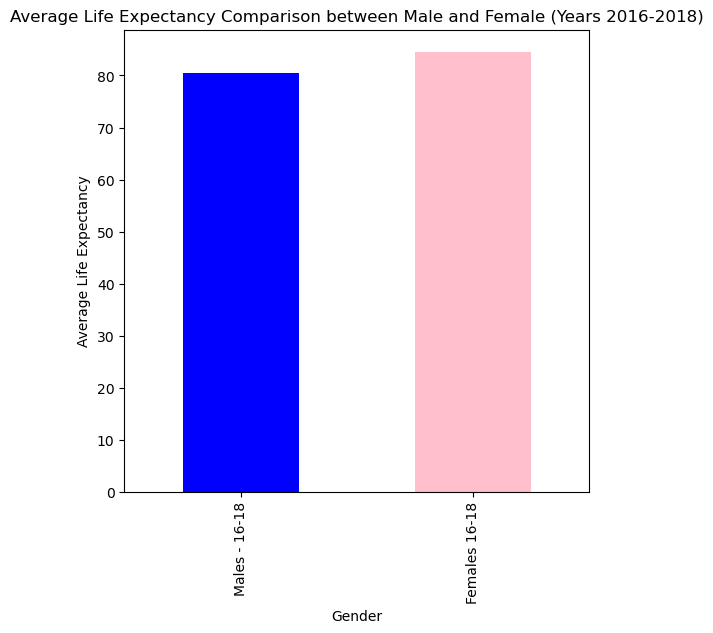

In [106]:
# Perform analysis and visualize the relationship
# Comparison for years 2016-2018
selected_columns_1618 = ['Males - 16-18', 'Females 16-18']

# Creating a new DataFrame with only the selected columns
gender_selected_df = gender_cleaned[selected_columns_1618]

# Calculating the average life expectancy for males and females
average_life_expectancy = gender_selected_df.mean()

# Plotting the bar chart
average_life_expectancy.plot(kind='bar', figsize=(6, 6), color=['blue', 'pink'])
plt.title("Average Life Expectancy Comparison between Male and Female (Years 2016-2018)")
plt.xlabel("Gender")
plt.ylabel("Average Life Expectancy")
plt.show()


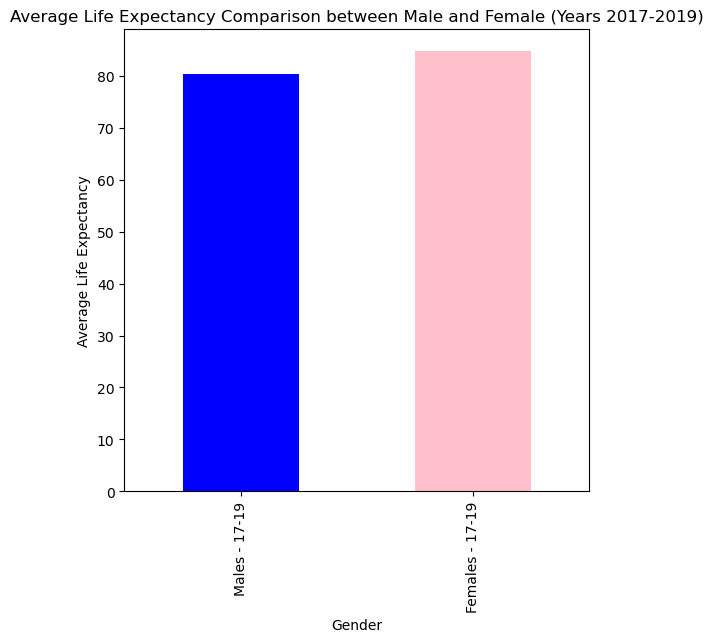

In [107]:
# Perform analysis and visualize the relationship
# Comparison for years 2017-2019
selected_columns_1719 = ['Males - 17-19', 'Females - 17-19']

# Creating a new DataFrame with only the selected columns
gender_2017 = gender_cleaned[selected_columns_1719]

# Calculating the average life expectancy for males and females
average_life_expectancy_2 = gender_2017.mean()

# Plotting the bar chart
average_life_expectancy_2.plot(kind='bar', figsize=(6, 6), color=['blue', 'pink'])
plt.title("Average Life Expectancy Comparison between Male and Female (Years 2017-2019)")
plt.xlabel("Gender")
plt.ylabel("Average Life Expectancy")
plt.show()

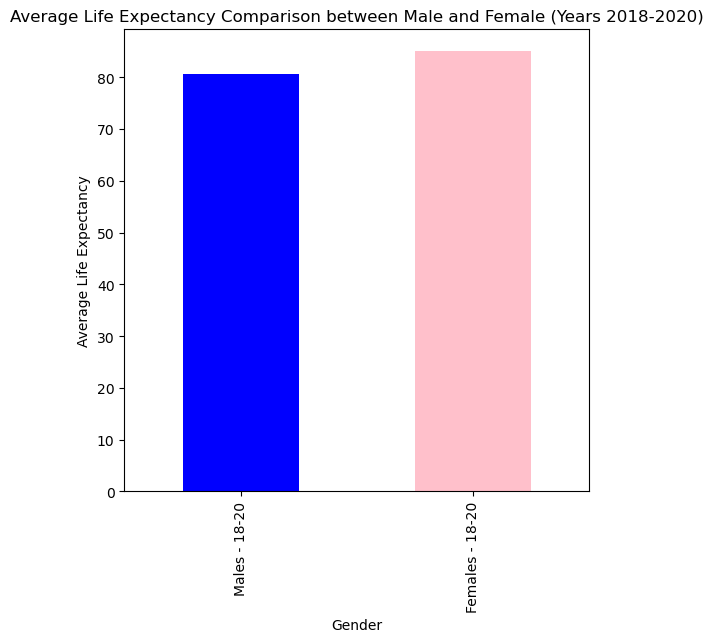

In [108]:
# Perform analysis and visualize the relationship
# Comparison for years 2018-2020
selected_columns_1820 = ['Males - 18-20', 'Females - 18-20']

# Creating a new DataFrame with only the selected columns
gender_selected_2020 = gender_cleaned[selected_columns_1820]

# Calculating the average life expectancy for males and females
average_life_expectancy_3 = gender_selected_2020.mean()

# Plotting the bar chart
average_life_expectancy_3.plot(kind='bar', figsize=(6, 6), color=['blue', 'pink'])
plt.title("Average Life Expectancy Comparison between Male and Female (Years 2018-2020)")
plt.xlabel("Gender")
plt.ylabel("Average Life Expectancy")
plt.show()


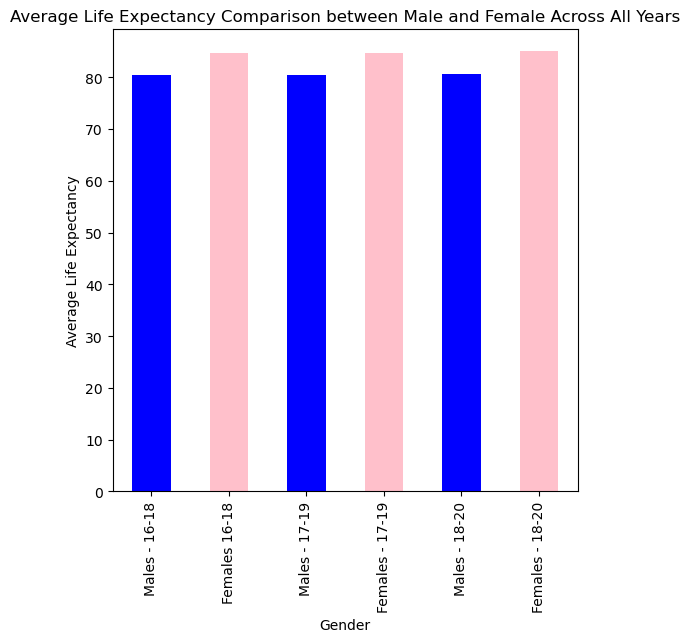

In [109]:
# Comparison across all years
all_columns = ['Males - 16-18', 'Females 16-18', 'Males - 17-19', 'Females - 17-19', 'Males - 18-20', 'Females - 18-20']

# Creating a new DataFrame with only the selected columns
gender_selected_all = gender_cleaned[all_columns]

# Calculating the average life expectancy for males and females
average_life_expectancy_4 = gender_selected_all.mean()

# Plotting the bar chart
average_life_expectancy_4.plot(kind='bar', figsize=(6, 6), color=['blue', 'pink'])
plt.title("Average Life Expectancy Comparison between Male and Female Across All Years")
plt.xlabel("Gender")
plt.ylabel("Average Life Expectancy")
plt.show()

### Statistical Analysis
The bar graphs provided above compare life expectancy of males and females across years 2016 - 2020; graphs reveal a consistent trend. Over this time periods, the life expectancy of females consistently suprasses that of males. The analysis of the bar charts clearly indicate that, on average, women tend to life longer than men in the given regions.

This insight is valuable for understanding dempgraphic trends. Forther investigation into the factors contibuting to this gender disparity could provide valuable information for targeted interventions and policies to improve overall life expectancy and address potential health inequalities.

In [110]:
# Importing dependencies
from scipy.stats import ttest_ind

In [111]:
# Performing t-test for life expectancy between Males and Females in years 2016-2018
males_16_18 = gender_cleaned["Males - 16-18"].dropna()
females_16_18 = gender_cleaned["Females 16-18"].dropna()
t_stat, p_value = ttest_ind(males_16_18, females_16_18)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -15.540449034635959, P-value: 2.9931461225693724e-37


In [112]:
# Performing t-test for life expectancy between Males and Females in years 2017-2019
males_17_19 = gender_cleaned["Males - 17-19"].dropna()
females_17_19 = gender_cleaned["Females - 17-19"].dropna()
t_stat, p_value = ttest_ind(males_17_19, females_17_19)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -16.097575077457098, P-value: 4.769687216095925e-39


In [113]:
# Performing t-test for life expectancy between Males and Females in years 2018-2020
males_18_20 = gender_cleaned["Males - 18-20"].dropna()
females_18_20 = gender_cleaned["Females - 18-20"].dropna()
t_stat, p_value = ttest_ind(males_18_20, females_18_20)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -16.21284674057393, P-value: 2.0285158556770274e-39


### Statistical Analysis
* T-statistic

The t-statistic measures how much the means of the two groups across years 2016-2018, 2017-2019 and 2018-2020 differ relative to the variation withing the groups. 
We can observe that across three different times the t-statistic is highly negative being -15.54 for years 2016-2018, -16.09 for years 2017-2019 and -16.21 for years 2018-2020, indicating that the mean life expectancy for males during those years is significantly lower than for females.

* P-value

P- value across given years is extremely small (close to zero - being respetively: 2.99, 4.76, 2.02). This indicates that the observed difference in life expectancy between males and females is highly unlikely to be due to random chance alone.

A small p-value suggests strong evidence against null hypothesis, which, in this case, would be that there is no difference in life expectancy betwen males and females during specific years.

In summary, the t-test results suggest that there is a statistically significant difference in life expectancy between males and females. In conclusion, on average, males have lower life expectancy compared to females.


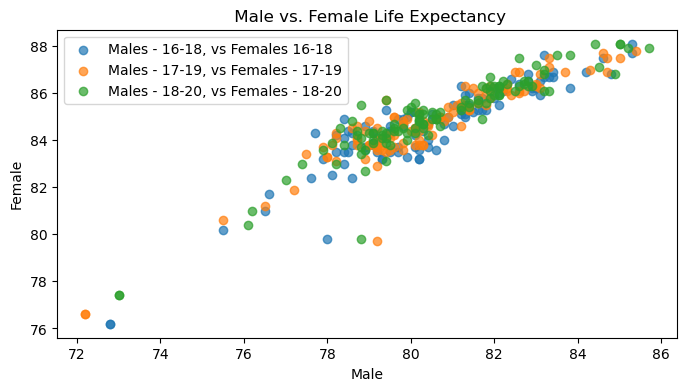

In [114]:
# Creating scatter plots that analyse female vs. male life expectancy
gender_cleaned_scatter = gender_cleaned[["Males - 16-18", "Males - 17-19", "Males - 18-20", "Females 16-18", "Females - 17-19", "Females - 18-20"]]
males_gender = gender_cleaned_scatter[["Males - 16-18", "Males - 17-19", "Males - 18-20"]]
females_gender = gender_cleaned_scatter [["Females 16-18", "Females - 17-19", "Females - 18-20"]]

# Setting up scatter plot
plt.figure(figsize=(8,4))

# Looping through pairs of columns and plotting each scatter plot
for male_col, female_col in zip(males_gender.columns, females_gender.columns):
    plt.scatter(
        males_gender[male_col],
        females_gender[female_col],
        label = f"{male_col}, vs {female_col}",
        alpha = 0.7
    )
plt.title(" Male vs. Female Life Expectancy")
plt.xlabel("Male")
plt.ylabel("Female")
plt.legend()
plt.show()  

The correlation between Life Expectancy for Male and Female is 0.92.


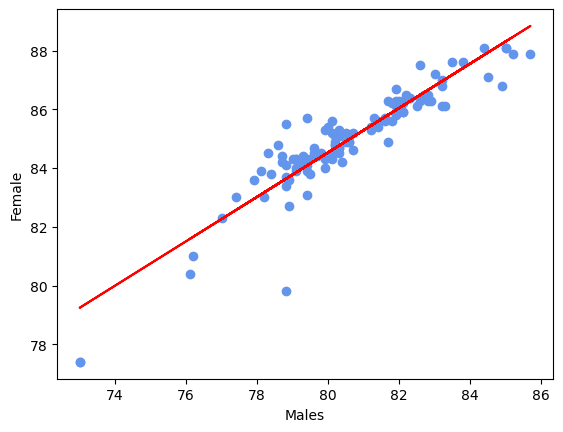

In [115]:
# Dependencies
import scipy.stats as st
# Calculating the correlation coefficient and a linear regression model 
correlation = st.pearsonr(males_gender[male_col], females_gender[female_col])

# Calculating linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(males_gender[male_col], females_gender[female_col])

# Generating y values for the regression line
regress_value = males_gender[male_col] * slope + intercept

# Creating the equation of the line for the legend
line = 'y='+ str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plotting the scatter plot
plt.scatter(males_gender[male_col], females_gender[female_col], color = "cornflowerblue")

# Plotting the regression line and labels
plt.plot(males_gender[male_col], regress_value, "r-")
plt.xlabel("Males")
plt.ylabel("Female")

# Printing statement
print(f"The correlation between Life Expectancy for Male and Female is {round(correlation[0], 2)}.")

plt.show()

#### Statistical Analysis
The correlation coefficient of 0.91 betweeen male and female life expectancies suggest a strong positive linear relationship. This indicates that as one gender's life expectancy increases, the other gender's life expectancy tends to increase proportionally. The high correlation suggest a consistent pattern in life expectancy between women and men, reflecting a strong positive association.

In [116]:
# Variable to hold a list of values
print(list(gender_cleaned["Females - 18-20"]))

[84.3, 88.1, 84.9, 86.3, 87.1, 86.5, 87.6, 87.9, 86.8, 85.1, 84.7, 86.5, 88.1, 86.3, 86.1, 86.4, 85.3, 82.7, 83.8, 82.3, 84.5, 84.9, 83.7, 84.5, 83.9, 83.8, 84.1, 84.3, 84.7, 84.2, 85.4, 86.1, 87.9, 87.0, 86.3, 86.2, 86.3, 86.1, 85.6, 85.2, 86.3, 84.4, 84.5, 85.3, 84.3, 83.4, 83.6, 84.0, 84.7, 84.3, 85.8, 85.4, 85.6, 86.8, 88.1, 87.5, 84.5, 84.5, 84.0, 86.3, 85.7, 84.2, 84.8, 84.4, 86.2, 84.6, 80.4, 86.7, 85.2, 84.1, 83.0, 84.9, 85.1, 87.2, 84.2, 85.9, 85.6, 85.6, 84.1, 83.9, 85.1, 84.4, 85.2, 85.4, 87.6, 86.1, 86.5, 86.3, 86.3, 86.4, 85.7, 85.5, 79.8, 83.0, 84.3, 85.7, 84.9, 84.9, 84.4, 83.1, 83.6, 83.9, 84.3, 84.8, 84.8, 77.4, 77.4, 81.0, 85.9, 85.9, 85.3]


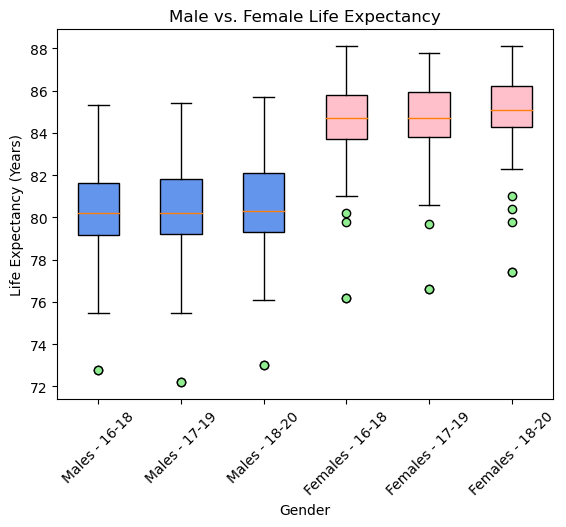

<Figure size 1500x1000 with 0 Axes>

In [117]:
# Creating data for boxplot
data = {"Males - 16-18": [79.2, 84.6, 80.8, 81.2, 83.4, 82.0, 83.2, 85.3, 84.2, 80.6, 79.5, 82.0, 84.8, 81.6, 83.3, 82.2, 79.5, 78.4, 78.5, 76.6, 
                          79.9, 80.3, 78.4, 78.2, 78.6, 79.7, 78.2, 79.5, 78.9, 79.1, 80.6, 83.2, 85.3, 83.4, 83.0, 82.1, 82.9, 83.1, 81.8, 80.9, 82.9, 
                          79.2, 80.2, 81.3, 80.8, 79.3, 79.1, 79.5, 80.5, 80.1, 81.7, 81.4, 81.0, 82.1, 83.8, 82.4, 80.4, 80.1, 79.1, 82.8, 81.3, 77.7, 
                          79.8, 79.2, 81.3, 79.8, 76.5, 81.3, 80.2, 79.1, 77.9, 79.8, 80.2, 82.8, 80.4, 81.6, 79.9, 81.2, 79.7, 78.1, 79.7, 79.4, 80.4, 
                          78.4, 83.1, 81.0, 82.6, 81.5, 81.4, 81.7, 79.4, 78.6, 78.0, 77.6, 78.9, 80.5, 80.2, 80.2, 78.4, 78.9, 78.6, 78.5, 79.3, 80.0, 
                          80.0, 72.8, 72.8, 75.5, 81.2, 81.2, 80.7],
        "Males - 17-19": [79.2, 84.6, 81.2, 81.3, 83.7, 82.3, 83.3, 85.4, 84.7, 80.2, 79.8, 81.9, 84.7, 81.6, 83.0, 82.3, 79.6, 78.0, 78.2, 77.2, 79.6, 
                          80.4, 78.7, 78.1, 78.7, 79.4, 78.7, 79.6, 78.6, 79.2, 80.7, 83.0, 85.0, 83.1, 82.7, 81.9, 82.2, 82.6, 81.4, 80.7, 82.6, 78.7, 
                          80.1, 80.6, 80.1, 78.9, 77.9, 79.0, 80.5, 79.5, 81.8, 81.4, 80.8, 82.4, 84.3, 82.5, 80.0, 80.2, 79.3, 83.1, 81.4, 78.2, 79.2, 
                          79.3, 81.1, 80.2, 76.5, 81.5, 79.6, 79.0, 78.2, 79.8, 80.3, 82.6, 80.2, 81.3, 79.9, 81.0, 79.8, 77.5, 79.8, 79.3, 80.4, 78.9, 
                          83.3, 81.2, 82.3, 81.8, 81.8, 81.9, 79.4, 79.0, 79.2, 78.0, 79.4, 80.9, 80.3, 80.3, 79.2, 79.3, 79.2, 79.2, 79.5, 80.1, 80.1, 
                          72.2, 72.2, 75.5, 81.6, 81.6, 80.9],
        "Males - 18-20": [79.1, 85.0, 81.7, 81.7, 84.5, 82.7, 83.5, 85.7, 84.9, 80.2, 80.3, 82.2, 85.0, 82.0, 83.3, 82.7, 79.9, 78.9, 78.4, 77.0, 79.6, 
                          80.5, 78.8, 78.3, 79.1, 79.5, 78.8, 79.1, 79.6, 79.3, 81.2, 83.2, 85.2, 83.2, 82.9, 82.1, 82.1, 82.5, 81.6, 80.5, 82.6, 78.7, 
                          80.1, 80.3, 80.1, 78.8, 77.9, 79.1, 80.3, 79.4, 81.9, 81.4, 81.8, 83.2, 84.4, 82.6, 79.8, 80.3, 79.9, 82.8, 81.6, 78.7, 78.6, 
                          79.3, 81.8, 80.7, 76.1, 81.9, 80.1, 79.4, 78.2, 80.2, 80.6, 83.0, 80.4, 82.0, 80.1, 81.4, 79.3, 78.1, 80.3, 79.6, 80.7, 80.0, 
                          83.8, 81.9, 82.8, 81.9, 82.1, 82.3, 79.4, 78.8, 78.8, 77.4, 79.0, 81.3, 80.6, 80.6, 79.7, 79.4, 78.9, 79.4, 79.9, 80.2, 80.2, 
                          73.0, 73.0, 76.2, 82.1, 82.1, 81.2],
        "Females - 16-18": [83.8, 87.5, 84.7, 86.3, 86.9, 86.2, 87.6, 88.1, 86.9, 83.6, 84.3, 85.8, 86.8, 85.8, 86.7, 86.1, 84.6, 83.0, 84.4, 81.7, 83.3, 
                            84.4, 84.1, 83.5, 83.8, 83.5, 84.2, 83.5, 84.6, 83.9, 84.9, 86.7, 87.7, 86.7, 86.2, 85.5, 86.2, 85.9, 85.3, 85.0, 86.1, 84.1, 
                            83.6, 85.0, 84.0, 83.2, 83.9, 84.4, 84.9, 84.2, 85.3, 85.5, 84.6, 86.0, 86.2, 86.6, 84.0, 83.7, 83.8, 86.5, 85.1, 84.3, 84.6, 
                            83.5, 85.5, 84.9, 81.0, 85.9, 85.1, 84.4, 83.2, 84.7, 84.7, 86.8, 83.7, 85.3, 85.0, 85.1, 83.7, 82.5, 84.9, 84.1, 84.7, 84.9, 
                            86.5, 85.5, 86.4, 85.2, 86.0, 85.8, 85.3, 84.3, 79.8, 82.4, 83.6, 85.1, 83.2, 83.2, 83.5, 83.7, 82.4, 83.5, 83.2, 85.2, 85.2, 
                            76.2, 76.2, 80.2, 85.3, 85.3, 84.9],
        "Females - 17-19": [83.6, 87.7, 84.6, 86.3, 86.9, 86.2, 87.5, 87.8, 86.9, 84.4, 83.9, 86.3, 87.5, 86.0, 86.4, 86.1, 85.0, 83.3, 84.1, 81.9, 84.2, 
                            84.6, 84.1, 83.8, 84.0, 83.5, 83.8, 83.7, 84.5, 84.0, 85.0, 86.3, 87.5, 86.8, 86.1, 85.8, 86.2, 86.0, 85.4, 85.0, 86.1, 84.6, 
                            84.4, 84.9, 83.8, 83.2, 83.7, 83.8, 84.2, 84.1, 85.5, 85.3, 84.8, 85.9, 87.0, 86.9, 84.4, 84.0, 83.8, 86.2, 85.3, 84.3, 84.5, 
                            84.1, 85.5, 85.2, 81.2, 86.2, 85.0, 83.8, 83.1, 84.7, 84.8, 86.9, 83.8, 85.4, 84.9, 85.2, 83.6, 83.4, 84.8, 84.1, 84.7, 84.4, 
                            87.1, 85.6, 86.4, 85.9, 86.2, 86.1, 85.7, 84.8, 79.7, 83.3, 84.2, 85.4, 83.8, 83.8, 83.7, 83.6, 82.9, 83.7, 83.6, 84.5, 84.5, 
                            76.6, 76.6, 80.6, 85.6, 85.6, 85.0],
        "Females - 18-20": [84.3, 88.1, 84.9, 86.3, 87.1, 86.5, 87.6, 87.9, 86.8, 85.1, 84.7, 86.5, 88.1, 86.3, 86.1, 86.4, 85.3, 82.7, 83.8, 82.3, 84.5, 
                            84.9, 83.7, 84.5, 83.9, 83.8, 84.1, 84.3, 84.7, 84.2, 85.4, 86.1, 87.9, 87.0, 86.3, 86.2, 86.3, 86.1, 85.6, 85.2, 86.3, 84.4, 
                            84.5, 85.3, 84.3, 83.4, 83.6, 84.0, 84.7, 84.3, 85.8, 85.4, 85.6, 86.8, 88.1, 87.5, 84.5, 84.5, 84.0, 86.3, 85.7, 84.2, 84.8, 
                            84.4, 86.2, 84.6, 80.4, 86.7, 85.2, 84.1, 83.0, 84.9, 85.1, 87.2, 84.2, 85.9, 85.6, 85.6, 84.1, 83.9, 85.1, 84.4, 85.2, 85.4, 
                            87.6, 86.1, 86.5, 86.3, 86.3, 86.4, 85.7, 85.5, 79.8, 83.0, 84.3, 85.7, 84.9, 84.9, 84.4, 83.1, 83.6, 83.9, 84.3, 84.8, 84.8, 
                            77.4, 77.4, 81.0, 85.9, 85.9, 85.3]
}
    
# Creating a Box plot 
box = plt.boxplot(data.values(), labels=data.keys(), patch_artist=True, flierprops=dict(markerfacecolor="lightgreen", marker="o", markersize=6))

# Setting up custom colours based on the data
colors = ["cornflowerblue","cornflowerblue", "cornflowerblue", "pink", "pink", "pink"]
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)

# Setting labels/ size
plt.xticks(rotation=45)
plt.title("Male vs. Female Life Expectancy")
plt.xlabel("Gender")
plt.ylabel("Life Expectancy (Years)")
plt.figure(figsize=(15, 10))
plt.tight_layout()

#Displaying results
plt.show()

#### Statistical Analysis
Once again it is evident, that female life expectancies consistently suprass those of males, with medians ranging from 84 to 86 years compared to males' 80 to 82 years. Despite the presence of outliers suggesting some variability, those deviations have minimal impact on the overarching trend. This robust pattern underscores the enduring observation that, on average, women enjoy longer life expectancies than males, contributing valuable insights to demographic disparities.

## Health Expenditure

In [5]:
# Merge the two dataframes
merged_health_expend = pd.merge(life_expect_df, health_expend_df, left_on=["Country","Year"], right_on=["Country","Year"], how="left")
merged_health_expend

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Health Expenditure (GDP)
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,10.11
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,9.53
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,8.81
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,7.90
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,8.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,NaN
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,NaN
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,NaN
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,NaN


In [6]:
# Clean up data (drop na, 0 values), rename columns, keep variables/columns of interest to this research question
merged_health_expend = merged_health_expend.rename(columns={'Life expectancy ': 'Life expectancy'})
merged_health_expend = merged_health_expend[["Country", "Year", "Status", "Life expectancy", "Health Expenditure (GDP)", "Total expenditure"]]
merged_health_expend = merged_health_expend.dropna()
merged_health_expend = merged_health_expend.drop(merged_health_expend[merged_health_expend["Year"] == 2015].index)
merged_health_expend = merged_health_expend[(merged_health_expend != 0).all(1)]
merged_health_expend

,Country,Year,Status,Life expectancy,Health Expenditure (GDP),Total expenditure
1,Afghanistan,2014,Developing,59.9,9.53,8.18
2,Afghanistan,2013,Developing,59.9,8.81,8.13
3,Afghanistan,2012,Developing,59.5,7.90,8.52
4,Afghanistan,2011,Developing,59.2,8.56,7.87
5,Afghanistan,2010,Developing,58.8,8.57,9.20
...,...,...,...,...,...,...
2923,Zimbabwe,2014,Developing,59.2,8.13,6.44
2924,Zimbabwe,2013,Developing,58.0,7.11,6.88
2925,Zimbabwe,2012,Developing,56.6,6.92,6.69
2926,Zimbabwe,2011,Developing,54.9,8.08,6.31


In [7]:
# Group by developing/developed against mean values
avg_life_expect = merged_health_expend["Life expectancy"].groupby(merged_health_expend["Status"]).mean()
health_expend_gdp = merged_health_expend["Health Expenditure (GDP)"].groupby(merged_health_expend["Status"]).mean()
health_expend_gov = merged_health_expend["Total expenditure"].groupby(merged_health_expend["Status"]).mean()

# Create mean summary dataframe
avg_summary_df = pd.DataFrame({"Mean Life Expectancy": avg_life_expect,
                               "Mean Health Expenditure (% of GDP)": health_expend_gdp,
                               "Mean Health Expenditure (% of gov expend)": health_expend_gov})

avg_summary_df

,Mean Life Expectancy,Mean Health Expenditure (% of GDP),Mean Health Expenditure (% of gov expend)
Status,,,
Developed,79.033118,8.018022,7.567355
Developing,67.279346,5.336452,5.549664


In [8]:
# Group by year and status against mean values
year_status_grouped = merged_health_expend.groupby(["Year", "Status"])
life_expect_grouped = pd.DataFrame(year_status_grouped[["Life expectancy", "Health Expenditure (GDP)", "Total expenditure"]].mean())
life_expect_grouped = life_expect_grouped.rename(columns={"Life expectancy": "Mean Life Expectancy", "Health Expenditure (GDP)": "Mean Health Expenditure (% of GDP)", "Total expenditure": "Mean Health Expenditure (% of gov expend)"})
life_expect_grouped = life_expect_grouped.sort_values(by="Year", ascending=False)
life_expect_grouped

Mean Life Expectancy  Mean Health Expenditure (% of GDP)  \
Year Status                                                                 
2014 Developing             69.773050                            5.759362   
     Developed              81.119355                            8.599677   
2013 Developing             69.518440                            5.664681   
     Developed              80.658065                            8.543548   
2012 Developing             69.152817                            5.505634   
     Developed              80.422581                            8.568065   
2011 Developing             68.806294                            5.497832   
     Developed              80.693548                            8.531613   
2010 Developing             68.132394                            5.542394   
     Developed              79.893548                            8.551290   
2009 Developing             68.271631                            5.686170   
     Developed              79.377419                            8.612258   
2008 Developed              78.800000                            7.971935   
     Developing             67.775177                            5.305532   
2007 Developing             67.248936                            5.236879   
     Developed              79.212903                            7.703226   
2006 Developing             66.843972                            5.256738   
     Developed              79.109677                            7.779677   
2005 Developing             66.403546                            5.308511   
     Developed              78.564516                            7.858710   
2004 Developing             65.741844                            5.258156   
     Developed              78.358065                            7.820000   
2003 Developing             65.531206                            5.145248   
     Developed              77.916129                            7.785806   
2002 Developing             65.473381                            5.134676   
     Developed              77.519355                            7.549032   
2001 Developing             65.358696                            4.957609   
     Developed              77.090323                            7.293226   
2000 Developing             65.002899                            4.759203   
     Developed              76.761290                            7.102258   

                 Mean Health Expenditure (% of gov expend)  
Year Status                                                 
2014 Developing                                   5.838156  
     Developed                                    8.200645  
2013 Developing                                   5.830780  
     Developed                                    8.459355  
2012 Developing                                   5.895141  
     Developed                                    7.887097  
2011 Developing                                   5.697273  
     Developed                                    7.320000  
2010 Developing                                   5.650352  
     Developed                                    8.511613  
2009 Developing                                   6.104113  
     Developed                                    8.579355  
2008 Developed                                    7.055484  
     Developing                                   5.381844  
2007 Developing                                   5.210213  
     Developed                                    7.289677  
2006 Developing                                   5.278794  
     Developed                                    7.354194  
2005 Developing                                   5.534894  
     Developed                                    7.436452  
2004 Developing                                   5.460142  
     Developed                                    7.443548  
2003 Developing                                   5.497376  
     Developed             

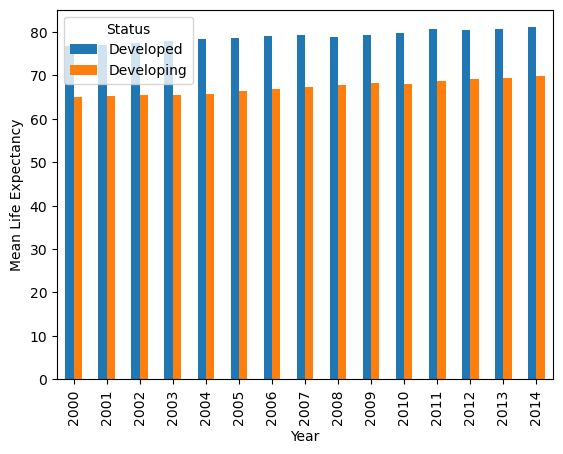

In [9]:
# Comparison view of mean life expectancy between Developed and Developing countries
merged_pivot = pd.pivot_table(merged_health_expend, 
                              values="Life expectancy",
                              index="Year",
                              columns="Status",
                              aggfunc="mean")
merged_pivot.plot.bar(ylabel="Mean Life Expectancy")
plt.show()

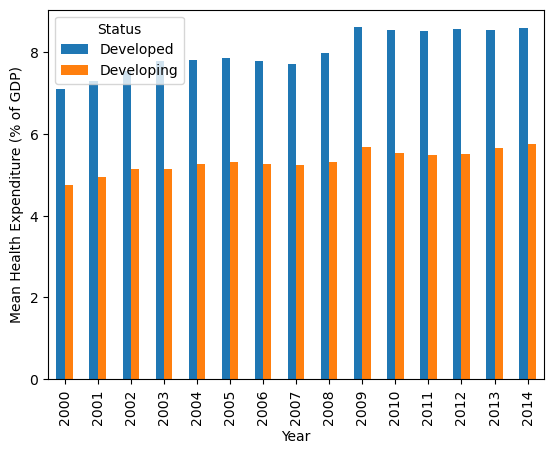

In [10]:
# Comparison view of health expenditure between Developing and Developed countries
merged_pivot = pd.pivot_table(merged_health_expend, 
                              values="Health Expenditure (GDP)",
                              index="Year",
                              columns="Status",
                              aggfunc="mean")
merged_pivot.plot.bar(ylabel="Mean Health Expenditure (% of GDP)")
plt.show()

### Analysis - Part 1
From the two graphs above, we can see that Developed countries on average have a higher life expectancy than Developing countries. Similarly for Health Expenditure, Developed countries significantly spend more on health than Developing countries. We can observe from the graphs that between 2009-2014, both Developing and Developed countries overall increased their spending on health compared to prior years of 2000-2008. Around 2010 onwards, there is a slight increase in the life expectancy for Developed countries, which does reflect the increase in health expenditure around the same time. For Developing countries, the life expectancy increases slightly in 2009 (which is also when health expenditure had a significant increase), before dropping slightly in 2010 and then increased from 2010 onwards. From above graphs, we can observe trends between Developed and Developing countries, however it does not give a representation of the relationship between Life Expectancy and Health Expenditure itself. 

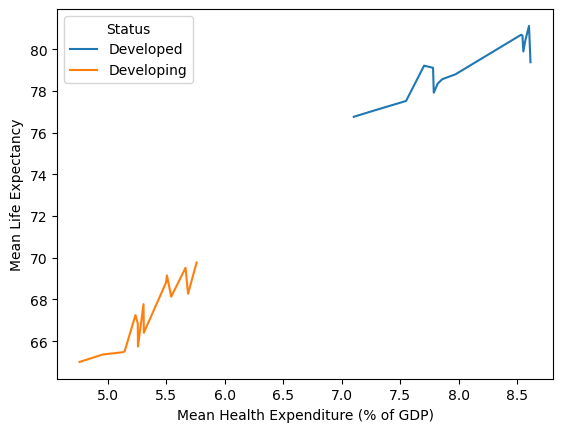

In [11]:
# Life expectancy vs. Health expenditure - developed vs. developing view 
merged_pivot = pd.pivot_table(life_expect_grouped, 
                              values="Mean Life Expectancy",
                              index="Mean Health Expenditure (% of GDP)",
                              columns="Status")
merged_pivot.plot(ylabel="Mean Life Expectancy")
plt.show()

The correlation between life expectancy and health expenditure (% of GDP) is 0.19.


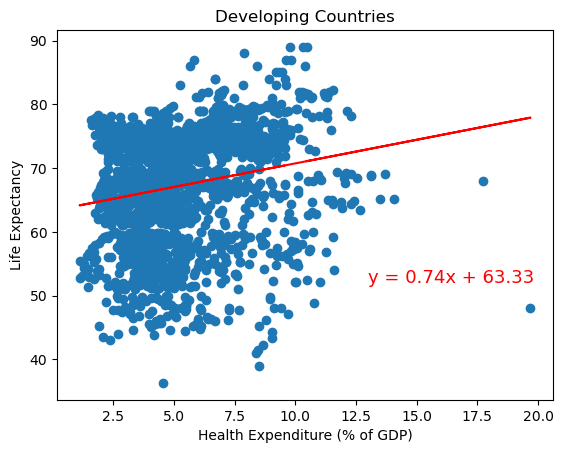

In [12]:
# Correlation between life expectancy and health expenditure for Developing countries
developing_df = merged_health_expend.loc[merged_health_expend["Status"] == "Developing"]
x_val = developing_df["Health Expenditure (GDP)"]
y_val = developing_df["Life expectancy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation between life expectancy and health expenditure (% of GDP) is " + str(round(rvalue, 2)) + ".")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"red")
plt.annotate(line_eq,(13,52),fontsize=13,color="red")
plt.xlabel("Health Expenditure (% of GDP)")
plt.ylabel("Life Expectancy")
plt.title("Developing Countries")
plt.show()

The correlation between life expectancy and health expenditure (% of GDP) is 0.37.


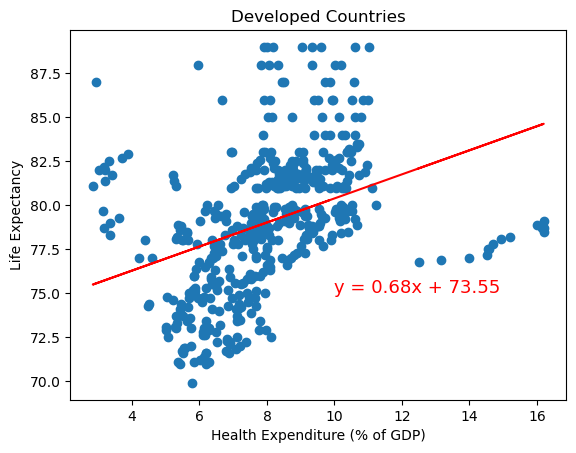

In [13]:
# Correlation between life expectancy and health expenditure for Developed countries
developed_df = merged_health_expend.loc[merged_health_expend["Status"] == "Developed"]
x_val = developed_df["Health Expenditure (GDP)"]
y_val = developed_df["Life expectancy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation between life expectancy and health expenditure (% of GDP) is " + str(round(rvalue, 2)) + ".")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"red")
plt.annotate(line_eq,(10,75),fontsize=13,color="red")
plt.xlabel("Health Expenditure (% of GDP)")
plt.ylabel("Life Expectancy")
plt.title("Developed Countries")
plt.show()

The correlation between life expectancy and health expenditure (% of GDP) is 0.36.


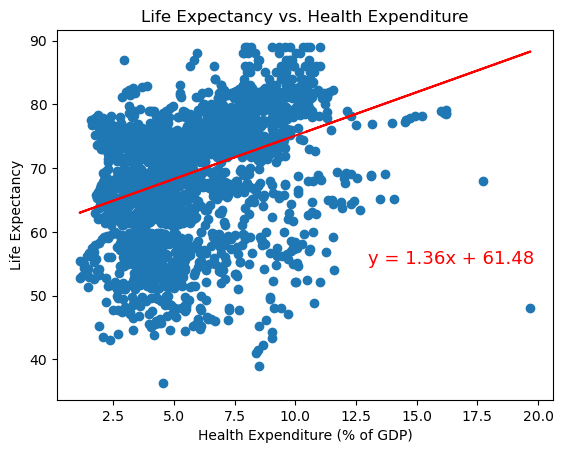

In [14]:
# Correlation between life expectancy and health expenditure across all countries
x_val = merged_health_expend["Health Expenditure (GDP)"]
y_val = merged_health_expend["Life expectancy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation between life expectancy and health expenditure (% of GDP) is " + str(round(rvalue, 2)) + ".")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"red")
plt.annotate(line_eq,(13,55),fontsize=13,color="red")
plt.xlabel("Health Expenditure (% of GDP)")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs. Health Expenditure")
plt.show()

### Analysis - Part 2
From above graphs, we can see that for Developing countries, there is a weak, positive relationship between health expenditure and life expectancy. For Developed countries, there is a medium-weak positive relationship between health expenditure and life expectancy. And overall across all countries, there is also a medium-weak positive relationship between health expnediture and life expectancy. Meaning across all graphs, as health expenditure increases, life expectancy slightly increases as well.

### Conclusion
From above observations and linear regression graphs, we can see that Health Expenditure has a slight impact on Life Expectancy. Although it is not a strong relationship, in conjunction with other factors, health expenditure has a positive impact on life expectancy.

## Residency Location

In [119]:
# Task (Shawn) Filter and analyze data related to residency location and life expectancy

# Perform analysis and visualize the relationship

## Financial Wellness

In [120]:
# Task (Cristian): Filter and analyze data related to income and life expectancy

# Perform analysis and visualize the relationship


In [121]:
# Use Matplotlib, or any other preferred library for visualization
# Create relevant plots for each research question


In [122]:
# Calculate median/average values for relevant columns

# Repeat for other relevant columns


In [123]:
# Share insights based on visualizations and summary statistics
# Discuss preliminary findings with the team


In [124]:
# Write a comprehensive report with key insights
# Discuss potential implications of the findings on life expectancy


In [125]:
# Use Markdown cells for documentation in Jupyter Notebook
# Create visualizations and insights for the presentation
